# 그래프 분포 확인

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import font_manager, rc

In [2]:
# 한글 깨짐 방지 코드
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 월별 통합 데이터 = df
df = pd.read_csv('../pre_data/월별_통합.csv',index_col=0)
df = df[['닭고기가격','병아리(원/수)','feedprice','oil_avg','한국기준금리','도축', '소_소비자가_int']]
df.head()

,닭고기가격,병아리(원/수),feedprice,oil_avg,한국기준금리,도축,소_소비자가_int
0,3202,250,533.6,107.066111,3.25,58873,59981
1,3202,250,533.6,107.066111,3.25,58873,59981
2,3668,420,529.9,112.537302,3.25,55879,56019
3,4169,500,527.9,117.745606,3.25,58750,50899
4,3399,332,526.3,113.723667,3.25,60940,53879


In [4]:
# 일별 통합 데이터 = data
data = pd.read_csv('../pre_data/일별_통합.csv',index_col=0)
data = data[['date','price','병아리(원/수)', 'oil_avg', '일별_평균기온', '소_소비자가_int', '돼지_소비자가_int', '미국기준금리', '한국기준금리']]
data.fillna(method='bfill',inplace=True) # 일별 데이터 data에서 유가 null 값을 null 뒤에 값으로 채움
data

,date,price,병아리(원/수),oil_avg,일별_평균기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2021-12-31,4047,400.0,76.703333,-3.9,111396.0,25177.0,0.25,1.00
1,2021-12-30,4047,400.0,77.850000,-0.7,111396.0,25411.0,0.25,1.00
2,2021-12-29,3895,400.0,77.566667,2.5,112019.0,26891.0,0.25,1.00
3,2021-12-28,3895,400.0,77.130000,0.0,110865.0,26936.0,0.25,1.00
4,2021-12-27,3743,400.0,76.530000,-4.6,109225.0,26993.0,0.25,1.00
...,...,...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200.0,108.180000,-2.6,58380.0,19570.0,0.75,3.25
2992,2012-01-05,3118,200.0,108.260000,-4.1,58870.0,19830.0,0.75,3.25
2993,2012-01-04,3118,300.0,108.470000,-4.0,61700.0,20300.0,0.75,3.25
2994,2012-01-03,3118,300.0,107.000000,-1.9,61030.0,20330.0,0.75,3.25


In [5]:
df.describe()

,닭고기가격,병아리(원/수),feedprice,oil_avg,한국기준금리,도축,소_소비자가_int
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3267.139344,360.713115,463.996721,69.379830,1.674180,79310.573770,77601.516393
std,434.789439,189.860909,42.251085,24.659065,0.780634,13620.253518,14731.791762
min,2457.000000,100.000000,414.000000,21.241587,0.500000,47742.000000,50899.000000
25%,2938.000000,203.000000,427.075000,50.104855,1.250000,70134.750000,63709.000000
50%,3218.000000,320.000000,441.450000,62.704316,1.500000,80270.500000,78637.000000
75%,3571.500000,500.000000,502.275000,98.439053,2.500000,87016.000000,84043.500000
max,4456.000000,860.000000,548.800000,117.745606,3.250000,118942.000000,110791.000000


In [6]:
data.describe()

,price,병아리(원/수),oil_avg,일별_평균기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
count,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000
mean,3273.932243,360.914553,69.413413,13.167089,77544.849132,19551.027036,0.761348,1.673314
std,501.571001,202.944184,24.370848,9.626387,15049.085885,3105.463488,0.753343,0.771399
min,2067.000000,100.000000,2.906667,-12.300000,0.000000,0.000000,0.250000,0.500000
25%,2927.000000,200.000000,50.292500,4.800000,64420.250000,17692.000000,0.250000,1.250000
50%,3279.000000,300.000000,62.918333,13.600000,78525.500000,19287.000000,0.250000,1.500000
75%,3590.000000,500.000000,97.880833,21.700000,84255.500000,21491.000000,1.250000,2.500000
max,4657.000000,900.000000,119.246667,30.300000,113196.000000,28277.000000,2.500000,3.250000


#### 닭고기가격 분포 확인

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='닭고기가격'>

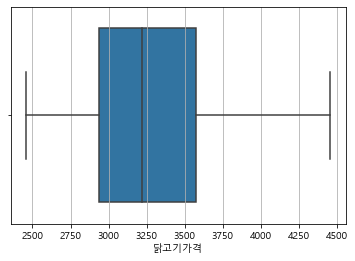

In [7]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
sns.boxplot(df['닭고기가격'])

# 타겟변수인 닭고기 가격의 분산이 작은 것이 확인 가능함

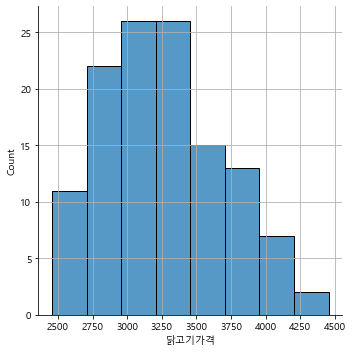

In [8]:
sns.displot(df['닭고기가격'])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='닭고기가격', ylabel='Density'>

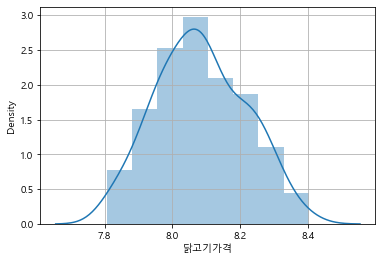

In [9]:
# 위의 그래프를 비교해보면 닭고기가격에 log를 취해주면 기존보다 더 정규분포에 가까워 진 것을 확인 할 수 있음.

f, ax = plt.subplots()

sns.distplot(np.log1p(df['닭고기가격']))


#### 변수 분포 확인

IndexError: list index out of range

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


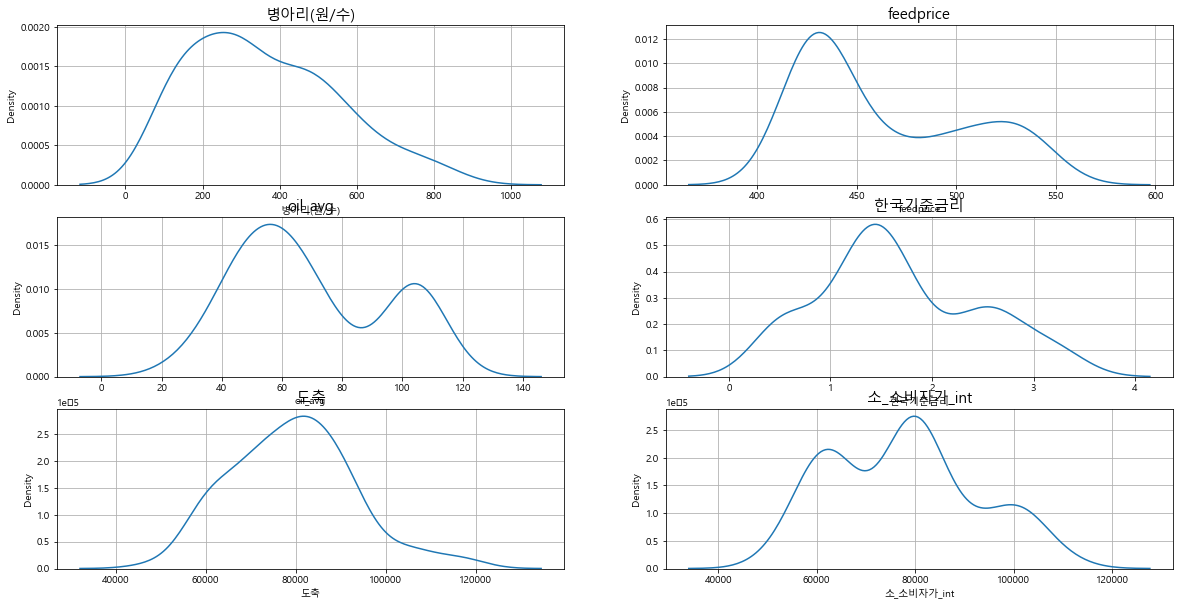

In [10]:
# 월별 원본 데이터로 분포 확인

fig, ax = plt.subplots(3, 2, figsize=(20,10))
count = 0
columns = ['병아리(원/수)','feedprice','oil_avg','한국기준금리','도축', '소_소비자가_int']

for row in range(6):
    for col in range(2):
        sns.kdeplot(df[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1

IndexError: list index out of range

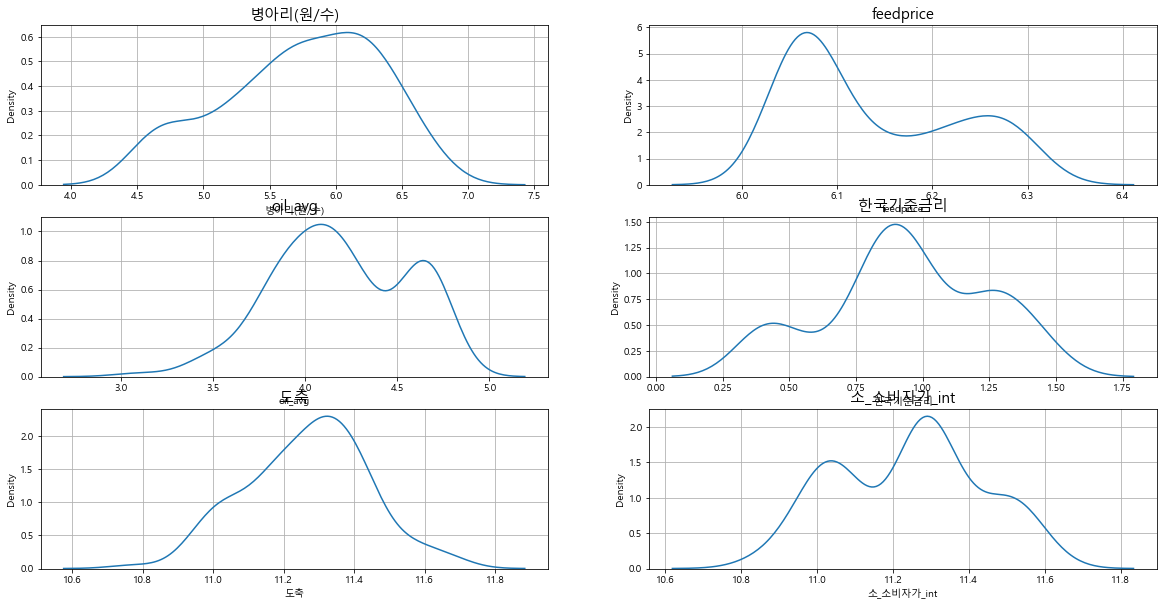

In [11]:
# 월별 데이터 정규화해서 분포 확인

data_log = df.copy()
skew_columns = ['병아리(원/수)','feedprice','oil_avg','한국기준금리','도축', '소_소비자가_int']

for c in skew_columns:
    data_log[c] = np.log1p(data_log[c].values)

fig, ax = plt.subplots(3, 2, figsize=(20, 10))

count = 0
for row in range(6):
    for col in range(2):
        sns.kdeplot(data_log[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1
        
plt.tight_layout()

In [ ]:
# 월별 통합 데이터 정규화

data_log['닭고기가격'] = np.log1p(df['닭고기가격'])
data_log

,닭고기가격,병아리(원/수),feedprice,oil_avg,한국기준금리,도축,소_소비자가_int
0,8.071843,5.525453,6.281519,4.682743,1.446919,10.983155,11.001800
1,8.071843,5.525453,6.281519,4.682743,1.446919,10.983155,11.001800
2,8.207674,6.042633,6.274574,4.732131,1.446919,10.930962,10.933464
3,8.335671,6.216606,6.270799,4.776983,1.446919,10.981063,10.837618
4,8.131531,5.808142,6.267770,4.742526,1.446919,11.017661,10.894515
...,...,...,...,...,...,...,...
117,8.162231,5.746203,6.200509,4.252031,0.559616,11.406375,11.505377
118,8.031060,6.013715,6.222576,4.303729,0.559616,11.302538,11.542873
119,8.272315,6.104793,6.232448,4.421167,0.559616,11.305028,11.615410
120,8.001690,5.755742,6.255750,4.392703,0.693147,11.371592,11.582526


In [12]:
data_raw=df.copy()
data_raw

,닭고기가격,병아리(원/수),feedprice,oil_avg,한국기준금리,도축,소_소비자가_int
0,3202,250,533.6,107.066111,3.25,58873,59981
1,3202,250,533.6,107.066111,3.25,58873,59981
2,3668,420,529.9,112.537302,3.25,55879,56019
3,4169,500,527.9,117.745606,3.25,58750,50899
4,3399,332,526.3,113.723667,3.25,60940,53879
...,...,...,...,...,...,...,...
117,3505,312,492.0,69.247955,0.75,89892,99247
118,3074,408,503.0,72.975152,0.75,81026,103039
119,3913,447,508.0,82.193333,0.75,81228,110791
120,2985,315,520.0,79.858712,1.00,86819,107207


### 닭고기가격 - 병아리 가격 분포 확인

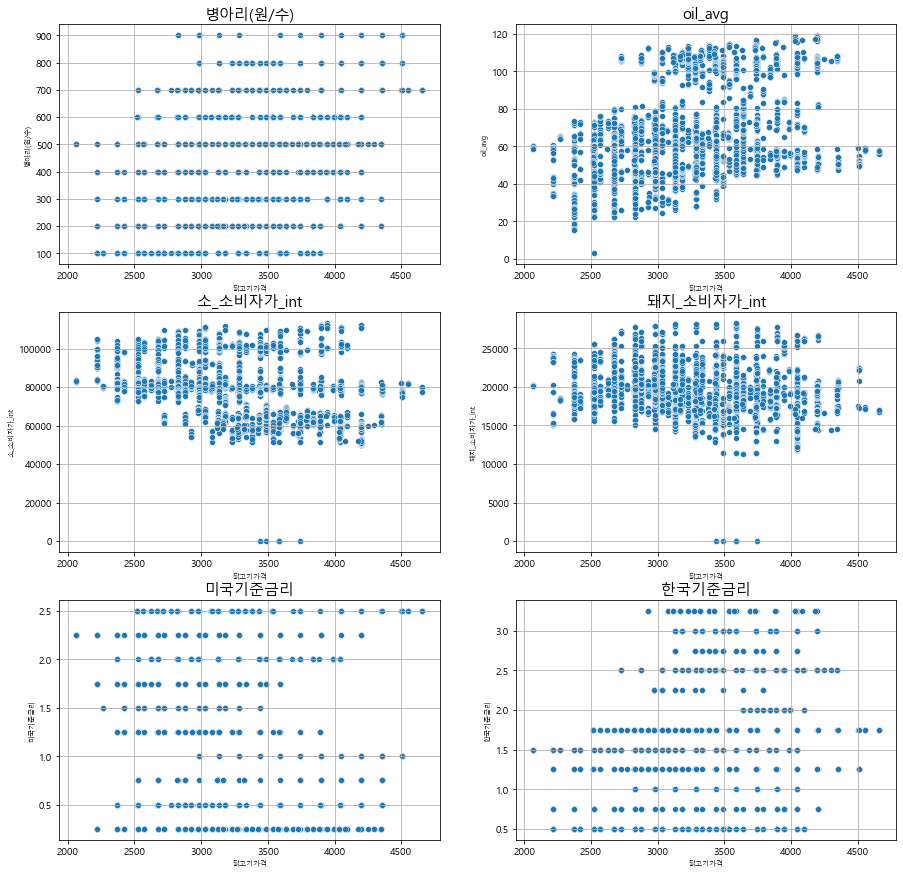

In [63]:
# 일별 데이터 분포를 산점도로 확인

fig, ax = plt.subplots(3, 2, figsize=(15,15))
count = 0
columns = ['병아리(원/수)','oil_avg','소_소비자가_int','돼지_소비자가_int','미국기준금리','한국기준금리']


for row in range(3):
    for col in range(2):
        sns.scatterplot(x = 'price', y = columns[count], palette = 'Blues', data = data, ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        ax[row][col].set_xlabel('닭고기가격',fontsize=7)
        ax[row][col].set_ylabel(columns[count],fontsize=7)
        count+=1

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

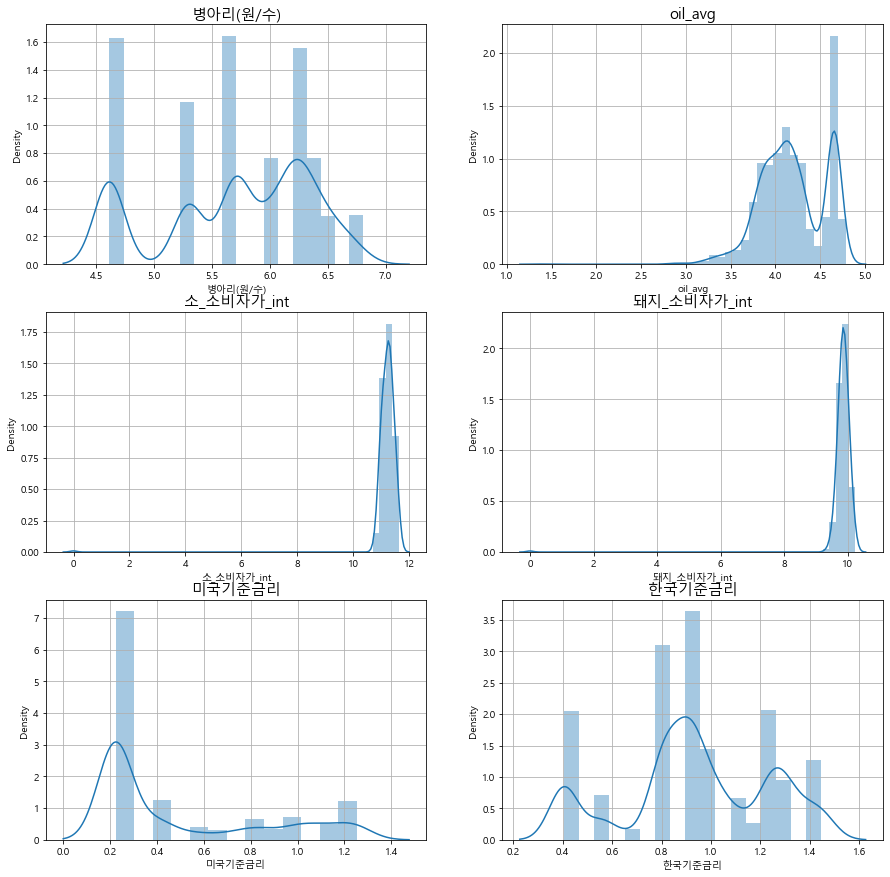

In [77]:
# 일별 데이터 정규성 확인

fig, ax = plt.subplots(3, 2, figsize=(15,15))
count = 0
columns = ['병아리(원/수)','oil_avg','소_소비자가_int','돼지_소비자가_int','미국기준금리','한국기준금리']

for row in range(3):
    for col in range(2):
        sns.distplot(np.log1p(data[columns[count]]),ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1

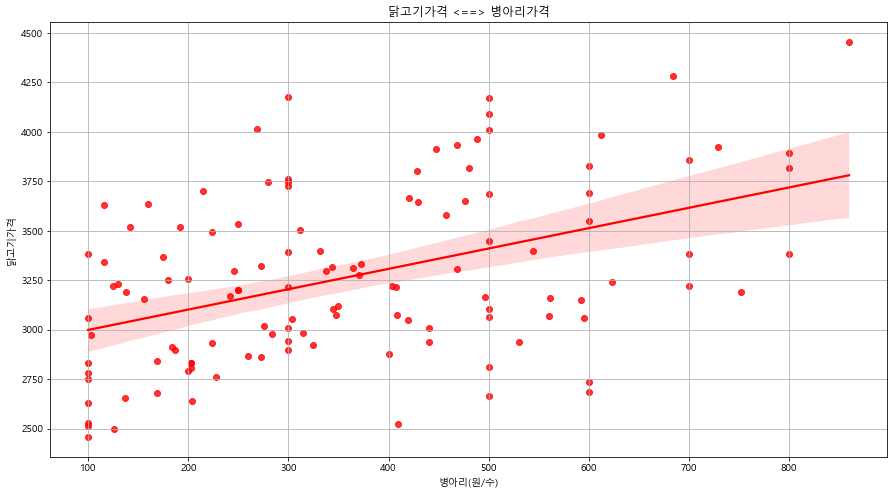

In [22]:
# 원본 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['병아리(원/수)']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 병아리가격")
fig = sns.regplot(x='병아리(원/수)', y="닭고기가격", data=raw_data, color="r")

In [41]:
columns[2]

'소_소비자가_int'

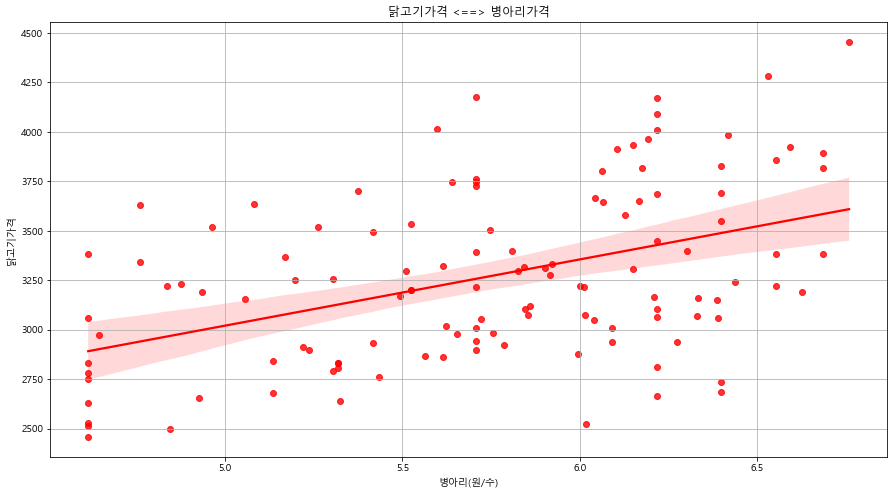

In [13]:
# 정규화한 데이터 분포 확인
raw_data = pd.concat([data_log['닭고기가격'], data_log['병아리(원/수)']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 병아리가격")
fig = sns.regplot(x='병아리(원/수)', y="닭고기가격", data=raw_data, color="r")

### 닭고기가격 - 월별 평균기온 분포 확인

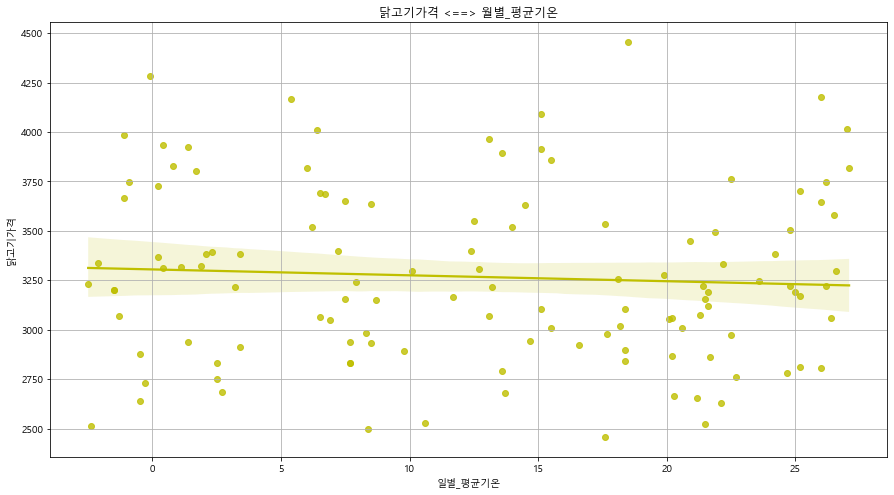

In [25]:
# 원본 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.regplot(x='일별_평균기온', y="닭고기가격", data=raw_data, color="y")

In [26]:
# 정규화 데이터 분포 확인
raw_data = pd.concat([data_log['닭고기가격'], data_log['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.regplot(x='일별_평균기온', y="닭고기가격", data=raw_data, color="y")

NameError: name 'data_log' is not defined

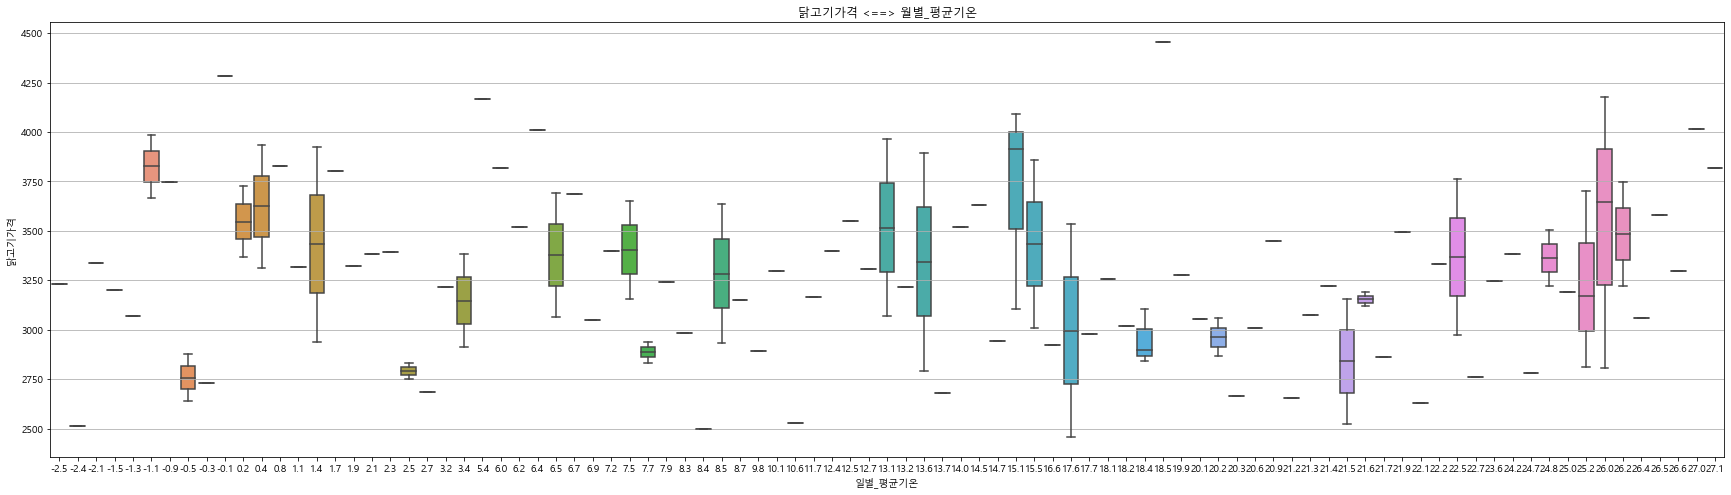

In [ ]:
# boxplot으로 원본 닭고기가격 - 월별 평균 기온 데이터 시각화

raw_data = pd.concat([df['닭고기가격'], df['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.boxplot(x='일별_평균기온', y="닭고기가격", data=raw_data)

In [27]:
# 정규화한 닭고기가격 - 월별 평균기온 데이터 분포 확인

raw_data = pd.concat([data_log['닭고기가격'], data_log['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
plt.title("닭고기가격 <==> 일별_평균기온")
fig = sns.boxplot(x='일별_평균기온', y="닭고기가격", data=raw_data)

NameError: name 'data_log' is not defined

### 닭고기 가격 - 수입량 분포 확인

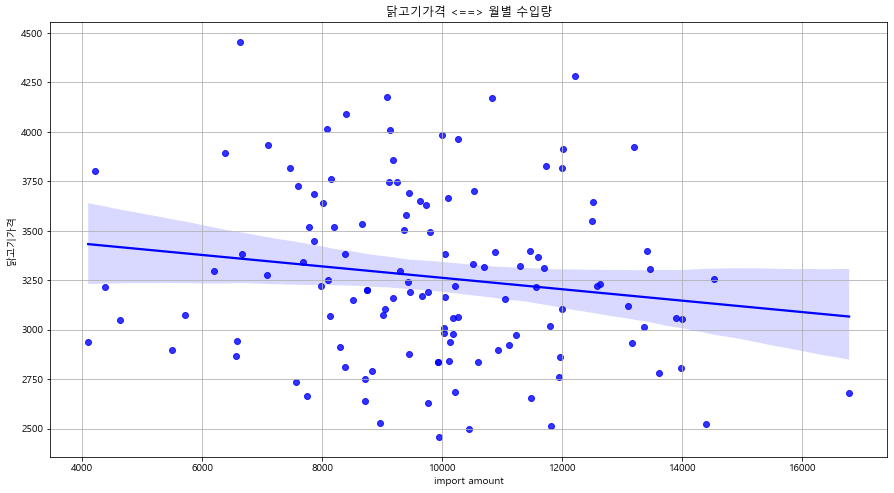

In [28]:
# 원본 데이터 분포 확인

raw_data = pd.concat([df['닭고기가격'], df['import amount']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별 수입량")
fig = sns.regplot(x='import amount', y="닭고기가격", data=raw_data, color="b")

In [29]:
# 정규화한 데이터 분포 확인

raw_data = pd.concat([data_log['닭고기가격'], data_log['import amount']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별 수입량")
fig = sns.regplot(x='import amount', y="닭고기가격", data=raw_data, color="b")

NameError: name 'data_log' is not defined

### 닭고기가격 - 폭염/한파 데이터 분포 확인

Text(0, 0.5, '닭고기가격')

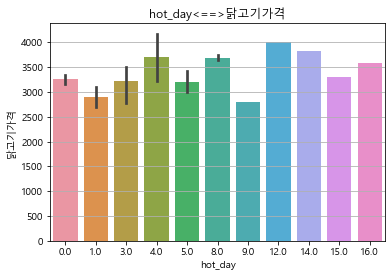

In [30]:
ax = plt.subplots() 
ax = sns.barplot(x='hot_day', y='닭고기가격', data=df) 
ax.set_title('hot_day<==>닭고기가격') 
ax.set_xlabel('hot_day') 
ax.set_ylabel('닭고기가격')

In [31]:
df.groupby("hot_day").mean()

,닭고기가격,병아리(원/수),일별_평균기온,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
hot_day,,,,,,,,,,,
0.0,3258.540000,377.520000,10.080000,0.56,9662.430000,463.817000,69.411583,599.530000,75852.82,77658.540000,19149.510000
1.0,2899.250000,339.000000,21.150000,0.00,10740.500000,451.050000,66.044857,645.500000,89754.75,79869.500000,21442.250000
3.0,3224.000000,170.666667,24.566667,0.00,11006.333333,463.933333,61.805357,734.666667,108118.00,83911.000000,22544.000000
4.0,3700.000000,212.500000,25.400000,0.00,10836.500000,522.650000,105.378043,499.000000,98965.00,55964.000000,18673.000000
5.0,3193.166667,266.333333,25.533333,0.00,10033.166667,454.116667,54.883136,545.000000,95792.50,78511.166667,22153.333333
8.0,3695.500000,354.500000,26.100000,0.00,10809.500000,500.750000,89.184397,529.000000,88882.50,81242.000000,21783.500000
9.0,2808.000000,203.000000,26.000000,0.00,13977.000000,430.000000,57.768485,718.000000,97472.00,82585.000000,18915.000000
12.0,4015.000000,269.000000,27.000000,0.00,8084.000000,538.400000,107.920606,775.000000,75362.00,62885.000000,18299.000000
14.0,3819.000000,480.000000,27.100000,0.00,11990.000000,431.600000,71.377391,754.000000,86408.00,79652.000000,22007.000000


Text(0, 0.5, '닭고기가격')

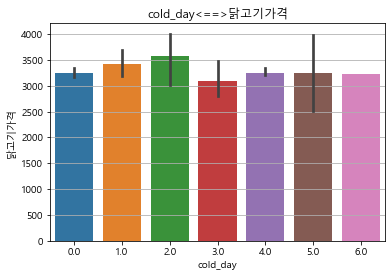

In [32]:
ax = plt.subplots() 
ax = sns.barplot(x='cold_day', y='닭고기가격', data=df) 
ax.set_title('cold_day<==>닭고기가격') 
ax.set_xlabel('cold_day') 
ax.set_ylabel('닭고기가격')

In [33]:
df.groupby("cold_day").mean()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
cold_day,,,,,,,,,,,
0.0,3251.069307,362.653465,15.49604,1.316832,9901.326733,462.463366,68.455158,635.29703,81217.950495,78174.356436,19794.871287
1.0,3424.666667,365.000000,0.90000,0.000000,8745.666667,481.233333,68.973336,471.00000,72622.333333,79494.333333,19467.166667
2.0,3572.200000,392.600000,-0.10000,0.000000,10699.400000,454.420000,67.116465,460.20000,74905.200000,75061.200000,18102.000000
3.0,3087.500000,442.000000,-0.80000,0.000000,8206.500000,451.950000,65.030050,470.25000,66244.750000,73479.500000,18079.500000
4.0,3248.000000,205.333333,-1.70000,0.000000,8397.333333,523.300000,105.126769,328.00000,60001.333333,60318.000000,17284.000000
5.0,3249.000000,356.000000,-1.75000,0.000000,10906.000000,418.600000,60.204136,583.00000,78608.500000,91386.000000,19483.000000
6.0,3232.000000,130.000000,-2.50000,0.000000,12621.000000,524.400000,105.037273,315.00000,60417.000000,61859.000000,14500.000000


### 닭고기가격 - 사료값 데이터 분포 확인

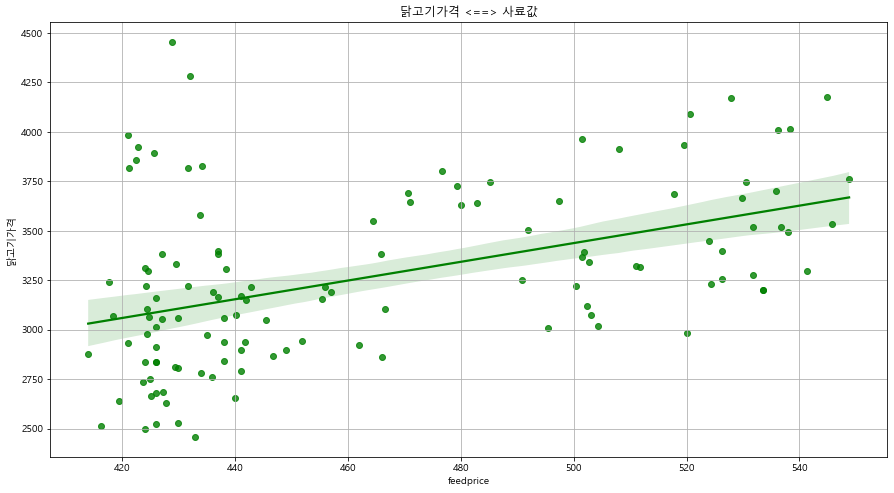

In [34]:
# 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['feedprice']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 사료값")
fig = sns.regplot(x='feedprice', y="닭고기가격", data=raw_data, color="g")

### 닭고기가격 - 유가 데이터 분포 확인

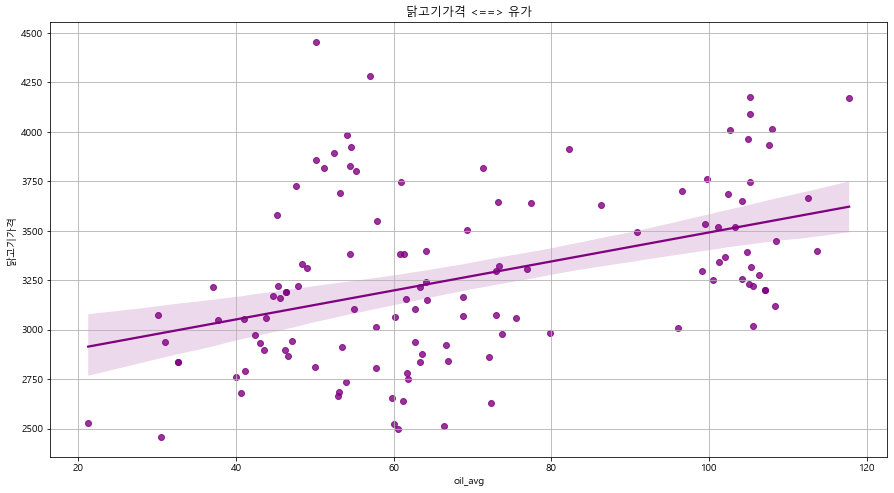

In [35]:
# 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['oil_avg']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 유가")
fig = sns.regplot(x='oil_avg', y="닭고기가격", data=raw_data, color="purple")